In [2]:
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import sys

sys.path.append('..')

from dqn import DQNAgentGoal
from gym_minigrid_navigation.utils import show_video
from gym_minigrid_navigation.navigation_models import Flatter, MLP
from gym_minigrid_navigation.wrappers import gen_wrapped_env

In [4]:
def run_episode(env, agent, train_mode=True, show_steps=False):
    """
    A hepler function for running single episode
    """
    
    state = env.reset() 
    if not train_mode:
        agent.expore = False
        print("From ", env.to_coords(state), "to", env.to_coords(env.goal_state))
    score = 0 
    done = False
    
    steps = 0
    while not done:
        steps += 1
        action = agent.act(state, env.goal_state)                           
        next_state, reward, done, _ = env.step(action)
        if train_mode:
            agent.update(state, env.goal_state, action, reward, next_state, done)
        score += reward                                     
        state = next_state 
            
        if (not train_mode) and show_steps:
            img = env.render('rgb_array')
            plt.imshow(img);
            plt.show()
            
    agent.reset_episode()
    env.close()
    
    if not train_mode:
        show_video()
    
    return score, steps

def run_episodes_and_display(env, agent, n_episodes=1000):
    """
    Runs a series of episode and display agent's performance
    """
    
    display_step = 100
    score = 0
    score_sum = 0
    scores = []
    steps = []
    for episode in range(1, n_episodes+1):
        score, step = run_episode(env, agent, train_mode=True)
        score_sum += score
        scores.append(score)
        steps.append(step)
        if episode%display_step==0:
            avg_score = score_sum/display_step
            print("Episode: {}. Average score: {}".format(episode, avg_score))
            score_sum = 0
            
    fig = plt.figure()
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Max Score')
    plt.xlabel('Episode #')
    plt.show()
    
    fig = plt.figure()
    plt.plot(np.arange(len(steps)), steps)
    plt.ylabel('Steps')
    plt.xlabel('Episode #')
    plt.show()

### reward functoin

In [5]:
def reward_function(cur_pos, next_pos, goal_pos):
    dist1 = np.linalg.norm(cur_pos - goal_pos)
    dist2 = np.linalg.norm(next_pos - goal_pos)

    reward = (dist1 - dist2)
    reward = 1 - np.sqrt(2) if reward == 0 else reward
    return reward

### environment 

In [6]:
env_name = 'MiniGrid-Empty-8x8-v0'
env = gen_wrapped_env(env_name, reward_function)

### DQN Agent

In [7]:
action_size = 3
seed = 42

state_size = 3 * (env.grid_size - 2)  ** 2  
qnetwork_local = Flatter(MLP(state_size, action_size, seed))
qnetwork_target = Flatter(MLP(state_size, action_size, seed))

agent = DQNAgentGoal(
    qnetwork_local = qnetwork_local, 
    qnetwork_target = qnetwork_target, 
    action_size = action_size
)

Running on device: cuda:0


### training 

Episode: 100. Average score: -22.07280468288398
Episode: 200. Average score: -3.6355068138280235
Episode: 300. Average score: 0.2707124817635526
Episode: 400. Average score: 0.8985067556288149
Episode: 500. Average score: 0.44983100490297423
Episode: 600. Average score: 0.05240101168664148
Episode: 700. Average score: 1.0526720188823067
Episode: 800. Average score: 0.3928824295523
Episode: 900. Average score: 0.688716256570693
Episode: 1000. Average score: 1.2347655514829317
Episode: 1100. Average score: 1.5979208207280362
Episode: 1200. Average score: 1.582093834308386
Episode: 1300. Average score: 1.5971251973478224
Episode: 1400. Average score: 1.3426835676703968
Episode: 1500. Average score: 1.5173613734424618
Episode: 1600. Average score: 1.557864629916881
Episode: 1700. Average score: 1.7106852670661947
Episode: 1800. Average score: 1.6083472318717447
Episode: 1900. Average score: 1.6180135927492487
Episode: 2000. Average score: 1.7710480067605547
Episode: 2100. Average score: 1.

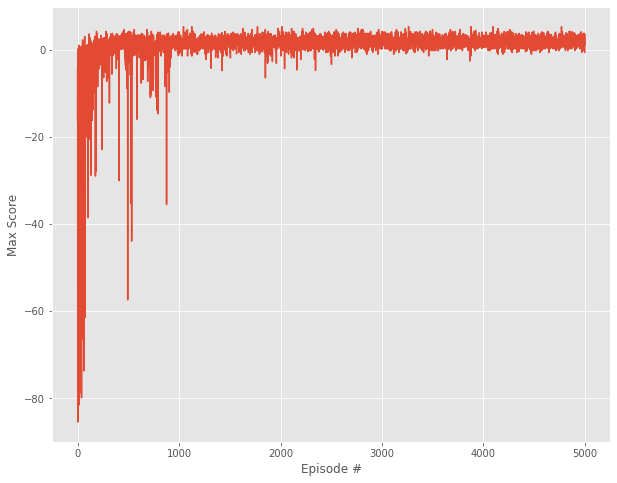

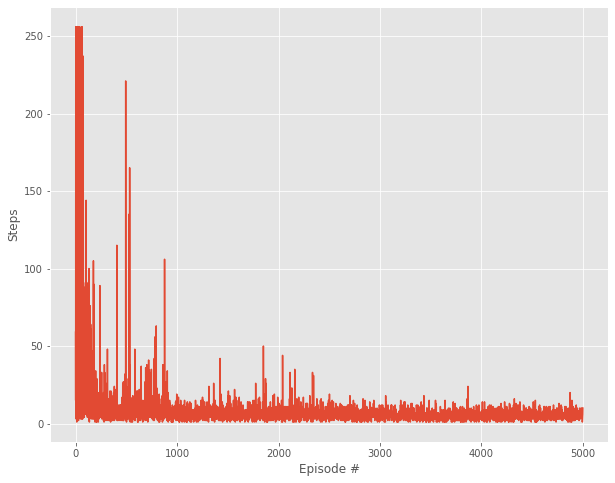

CPU times: user 3min 47s, sys: 1.04 s, total: 3min 49s
Wall time: 3min 49s


In [8]:
%%time

run_episodes_and_display(env, agent, n_episodes=5_000)

### visualisation 

In [9]:
env = gen_wrapped_env(env_name, reward_function)
run_episode(env, agent, train_mode=False, show_steps=False)

From  [1 1] to [3 4]


(3.1913377130908938, 6)